In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Mall_Customers.xlsx")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis



In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


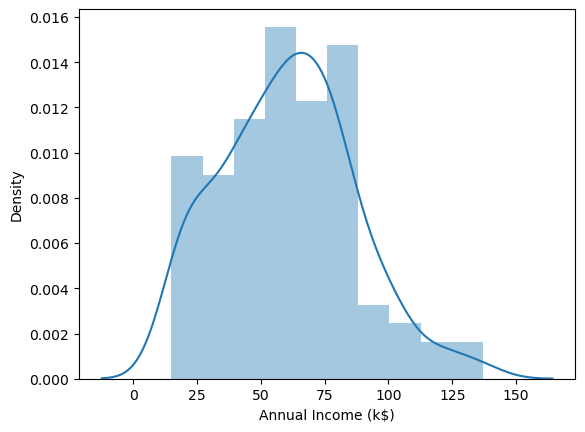

In [5]:
sns.distplot(df['Annual Income (k$)']);

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

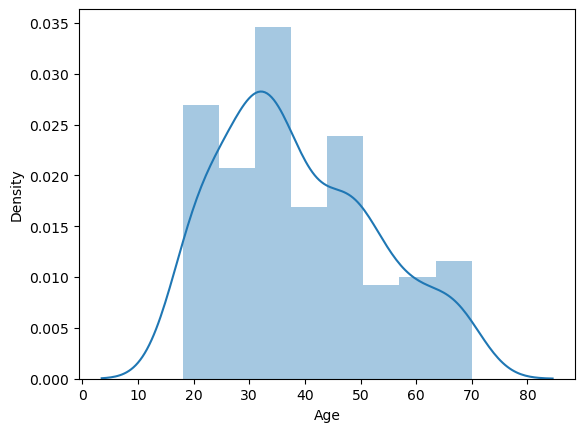

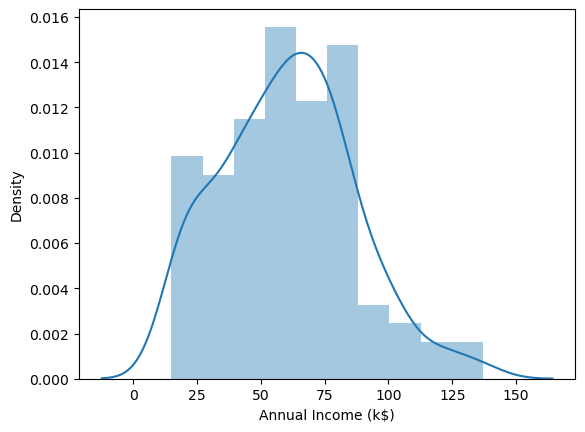

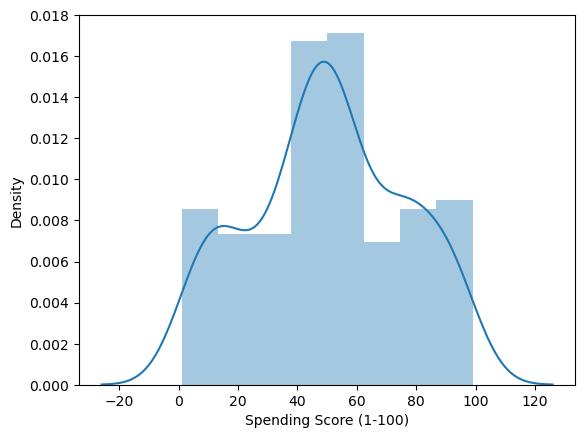

In [7]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

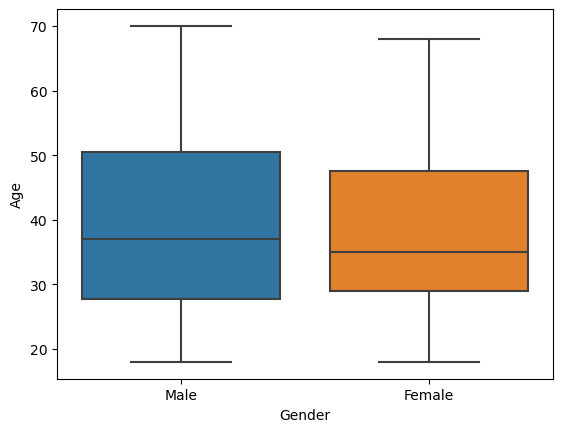

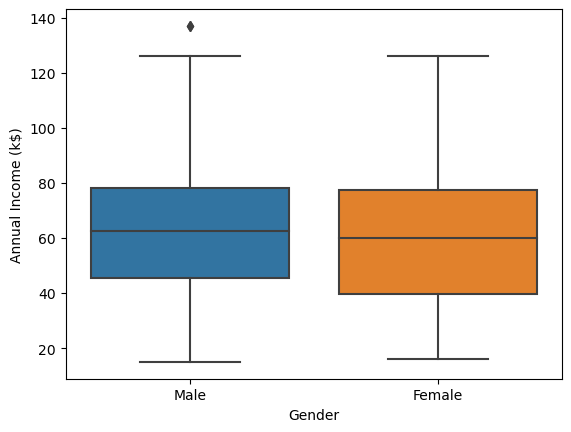

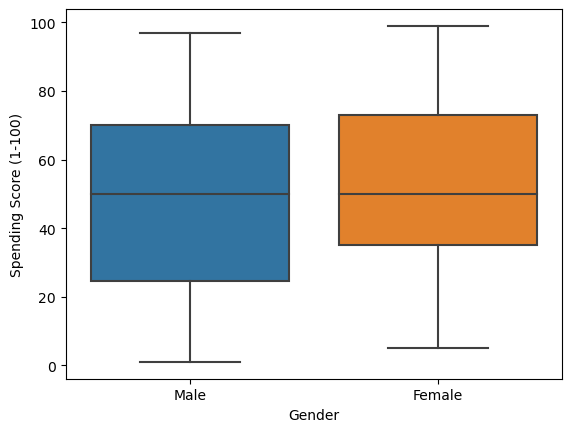

In [8]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])

In [9]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

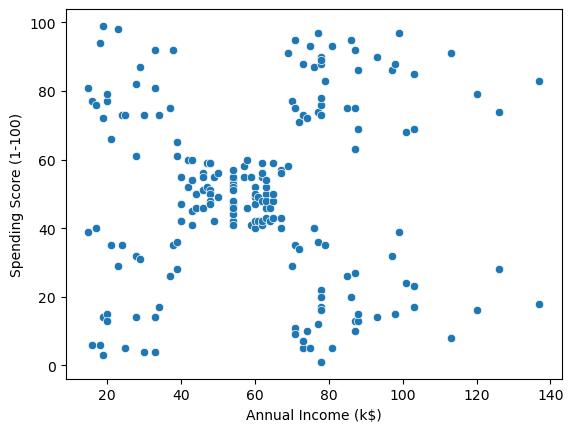

In [10]:
sns.scatterplot(data=df, x= 'Annual Income (k$)', y='Spending Score (1-100)')

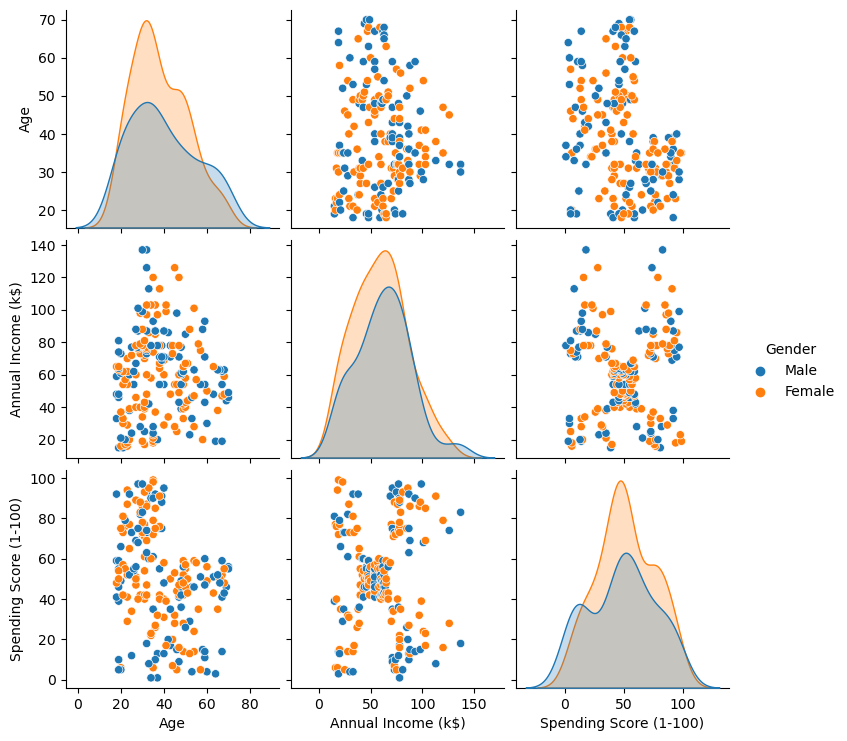

In [11]:
df=df.drop('CustomerID', axis=1)
sns.pairplot(df,hue='Gender')

In [12]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [13]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot: >

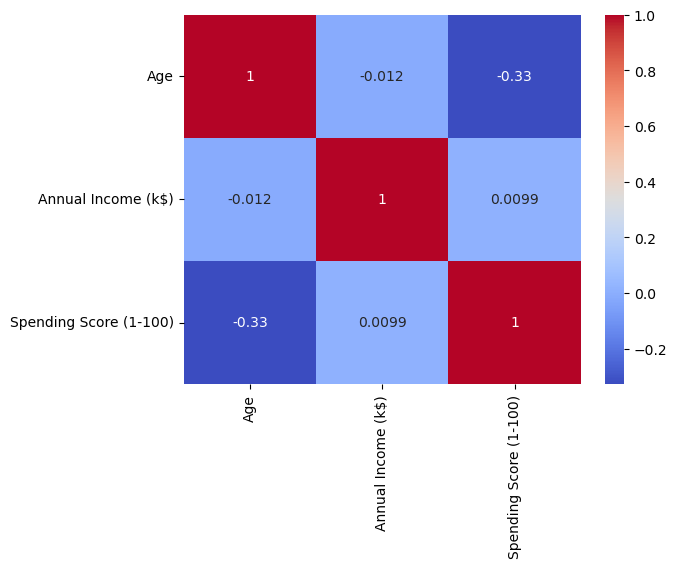

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Clustering- Univariate, Bivariate, Mulivariate

In [15]:
cluster = KMeans(n_clusters=3)

In [16]:
cluster.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [17]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [18]:
df['Income Cluster'] = cluster.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [19]:
df['Income Cluster'].value_counts()

0    92
1    72
2    36
Name: Income Cluster, dtype: int64

In [20]:
cluster.inertia_

23528.152173913055

In [21]:
inertia_scores=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [22]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3941.4163614163617,
 2822.4996947496943,
 2229.5897047397057,
 1743.4772727272725]

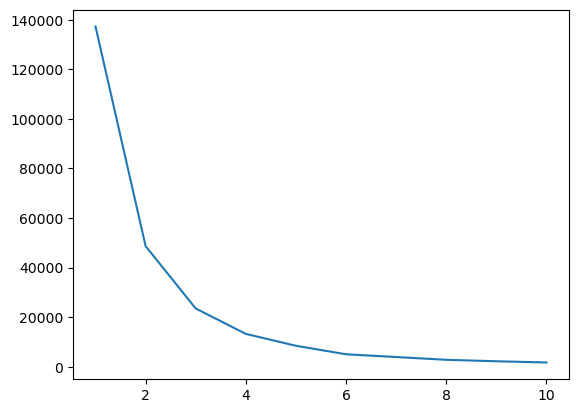

In [23]:
plt.plot(range(1,11),inertia_scores)

In [24]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)',].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


In [25]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [26]:
#Bivariate Clustering

In [30]:
cluster2 = KMeans(n_clusters=5)
cluster2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster']= cluster2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Incomr Cluster,Spending and Income Cluster
0,Male,19,15,39,1,0,0
1,Male,21,15,81,1,6,4
2,Female,20,16,6,1,0,0
3,Female,23,16,77,1,6,4
4,Female,31,17,40,1,0,0


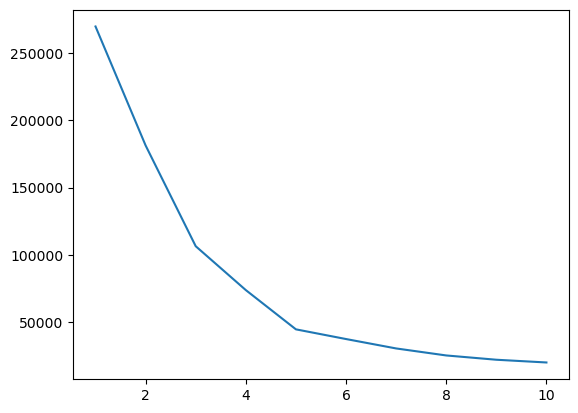

In [29]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_scores2)                   

In [38]:
centers = pd.DataFrame(cluster2.cluster_centers_)
centers.columns = ['x', 'y']

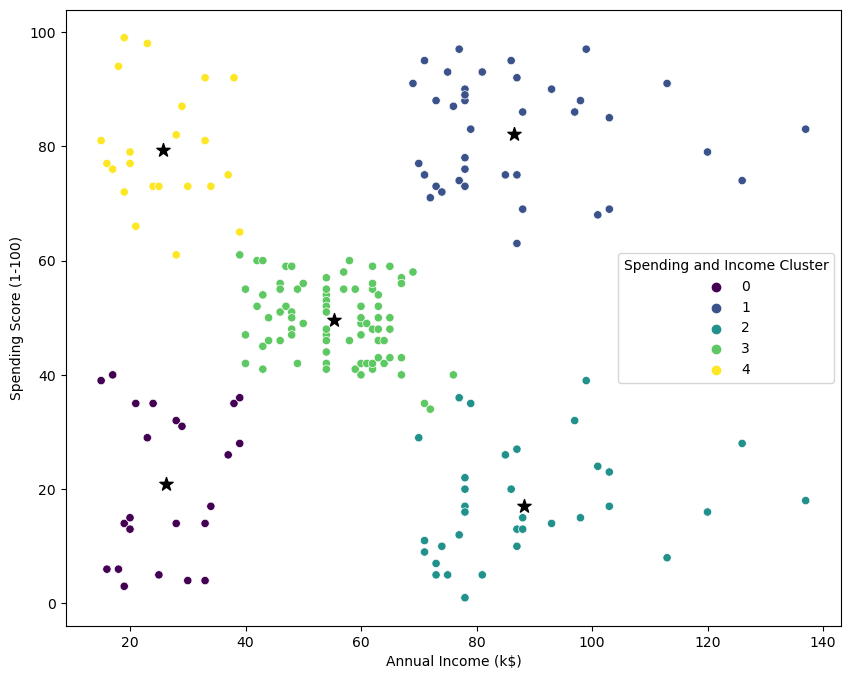

In [63]:

plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100,c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue = 'Spending and Income Cluster', palette='viridis' )
plt.savefig('clustering_bivariate.png')

In [41]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.457143,0.542857
3,0.592593,0.407407
4,0.590909,0.409091


In [47]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)',].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,42.716049,55.296296,49.518519
4,25.272727,25.727273,79.363636


In [48]:
#mulivariate clustering

from sklearn.preprocessing import StandardScaler

In [49]:
scale = StandardScaler()

In [52]:
dff = pd.get_dummies(df)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Incomr Cluster,Spending and Income Cluster,Gender_Female,Gender_Male
0,19,15,39,1,0,0,0,1
1,21,15,81,1,6,4,0,1
2,20,16,6,1,0,0,1,0
3,23,16,77,1,6,4,1,0
4,31,17,40,1,0,0,1,0


In [53]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Incomr Cluster', 'Spending and Income Cluster',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [56]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)',"Gender_Male"]]

In [57]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [58]:
dff = scale.fit_transform(dff)

In [59]:
dff = pd.DataFrame(scale.fit_transform(dff))

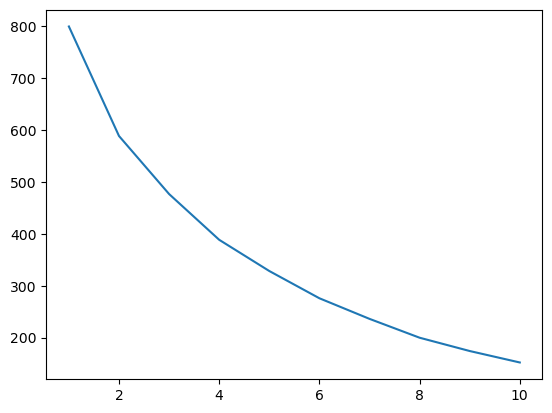

In [60]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3)     

In [61]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Incomr Cluster,Spending and Income Cluster
0,Male,19,15,39,1,0,0
1,Male,21,15,81,1,6,4
2,Female,20,16,6,1,0,0
3,Female,23,16,77,1,6,4
4,Female,31,17,40,1,0,0
...,...,...,...,...,...,...,...
195,Female,35,120,79,2,7,1
196,Female,45,126,28,2,5,2
197,Male,32,126,74,2,7,1
198,Male,32,137,18,2,5,2


In [62]:
df.to_csv('Clustering.csv')